# Laboratorio 1 - Data Science

Sara Paguaga 20634

Guillermo Santos 191517

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import statsmodels.api as sm
import statsmodels.stats.diagnostic as diag
import pandas as pd
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# Preparación de datos

In [3]:
# Cargando dataset con pandas
data = pd.read_csv('risk_factors_cervical_cancer.csv')
data = pd.DataFrame(data)
data = data.replace('?', np.nan) # Reemplazando ? por NaN para un uso posterior.
data.columns = ['age', 'num_sexual_partners', 'first_sexual_intercourse', 
                'num_pregnancies', 'smokes', 'smokes_years', 'smokes_packs_year', 
                'hormonal_contraceptives', 'hormonal_contraceptives_years', 
								'iud', 'iud_years', 'stds', 'stds_number', 'stds_condylomatosis', 
                'stds_cervical_condylomatosis', 'stds_vaginal_condylomatosis', 
								'stds_vulvo_perineal_condylomatosis', 'stds_syphilis', 'stds_pelvic_inflammatory_disease', 
                'stds_genital_herpes', 'stds_molluscum_contagiosum', 'stds_aids', 'stds_hiv', 'stds_hepatitis_b', 
								'stds_hpv', 'stds_number_of_diagnosis', 'stds_time_since_first_diagnosis', 'stds_time_since_last_diagnosis', 
								'dx_cancer', 'dx_cin', 'dx_hpv', 'dx', 'hinselmann', 'schiller', 'citology', 'biopsy'
]

missing_values = data.isnull().sum()	# Contando valores faltantes
#print(missing_values)
# Eliminar iuid y iud_years
data = data.drop(['iud', 'iud_years'], axis=1)
# Replace '1.0' and '0.0' with 1 and 0
data = data.replace('1.0', 1)
data = data.replace('0.0', 0)


### Definiendo tipo de variables

* **Age** - (Cuantitativa discreta)
* **Number of sexual partners** - (Cuantitativa discreta)
* **First sexual intercourse** - (Cuantitativa discreta)
* **Num of pregnancies** - (Cuantitativa discreta)
* **Smokes** - (Cualitativa)
* **Smokes years** - (Cuantitativa discreta)
* **Smokes packs/year** - (Cuantitativa discreta)
* **Hormonal contraceptives** - (Cualitativa)
* **Hormonal contraceptives years** - (Cuantitativa discreta)
* **STDs** - (Cualitativa)
* **STDs number** - (Cuantitativa discreta)
* **STDs (condylomatosis)** - (Cualitativa)
* **STDs (cervical condylomatosis)** - (Cualitativa)
* **STDs (vaginal condylomatosis)** - (Cualitativa)
* **STDs (vulvo-perineal condylomatosis)** - (Cualitativa)
* **STDs (syphilis)** - (Cualitativa)
* **STDs (pelvic inflammatory disease)** - (Cualitativa)
* **STDs (genital herpes)** - (Cualitativa)
* **STDs (molluscum contagiosum)** - (Cualitativa)
* **STDs (AIDS)** - (Cualitativa)
* **STDs (HIV)** - (Cualitativa)
* **STDs (Hepatitis B)** - (Cualitativa)
* **STDs (HPV)** - (Cualitativa)
* **STDs (Number of diagnosis)** - (Cuantitativa discreta)
* **STDs (Time since first diagnosis)** - (Cuantitativa continua)
* **STDs (Time since last diagnosis)** - (Cuantitativa continua)
* **Dx (Cancer)** - (Cualitativa)
* **Dx (CIN)** - (Cualitativa)
* **Dx (HPV)** - (Cualitativa)
* **Dx (Cancer)** - (Cualitativa)
* **Dx** - (Cualitativa)
* **Hinselmann** - (Cualitativa)
* **Schiller** - (Cualitativa)
* **Citology** - (Cualitativa)
* **Biopsy** - (Cualitativa)


### Obteniendo tipo de variables

In [22]:
categorical_vars = ['dx_cancer', 'dx_cin', 'dx_hpv', 'dx', 'hinselmann', 'schiller', 'citology', 'biopsy', 'smokes', 'stds', 'stds_condylomatosis', 'stds_cervical_condylomatosis', 'stds_vaginal_condylomatosis', 'stds_vulvo_perineal_condylomatosis', 'stds_syphilis','stds_pelvic_inflammatory_disease', 'stds_genital_herpes', 'stds_molluscum_contagiosum', 'stds_aids', 'stds_hiv', 'stds_hepatitis_b', 'stds_hpv']
cuantitative_vars = ['age', 'num_sexual_partners', 'first_sexual_intercourse', 'num_pregnancies', 'smokes_years', 'smokes_packs_year', 'hormonal_contraceptives_years', 'stds_number', 'stds_number_of_diagnosis', 'stds_time_since_first_diagnosis', 'stds_time_since_last_diagnosis']

### Estadística descriptiva - Variables cuantitativas

In [20]:
data.describe()

,age,smokes,hormonal_contraceptives,stds,stds_condylomatosis,stds_cervical_condylomatosis,stds_vaginal_condylomatosis,stds_vulvo_perineal_condylomatosis,stds_syphilis,stds_pelvic_inflammatory_disease,...,stds_hpv,stds_number_of_diagnosis,dx_cancer,dx_cin,dx_hpv,dx,hinselmann,schiller,citology,biopsy
count,858.000000,845.000000,750.000000,753.000000,753.000000,753.0,753.000000,753.000000,753.000000,753.000000,...,753.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.145562,0.641333,0.104914,0.058433,0.0,0.005312,0.057105,0.023904,0.001328,...,0.002656,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.352876,0.479929,0.306646,0.234716,0.0,0.072739,0.232197,0.152853,0.036442,...,0.051503,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Estudiando variables numéricas

#### Histogramas

In [36]:
frequency_rows = len(cuantitative_vars) // 3 + 1
frequency_cols = 3

n = len(cuantitative_vars)
rows = n // frequency_cols 
if n % frequency_cols:
    rows += 1

# Crea una figura de subgráficos con el número correcto de filas y columnas y un tamaño específico
fig = make_subplots(rows=rows, cols=frequency_cols, subplot_titles=cuantitative_vars,
                    specs=[[{'type': 'histogram'}]*frequency_cols]*rows,
                    vertical_spacing=0.05)

# Actualizar el tamaño de la figura
fig.update_layout(autosize=False, width=1200, height=800*rows, showlegend=False)

# Agrega un histograma para cada variable cuantitativa
for i, var in enumerate(cuantitative_vars, start=1):
    data[var] = pd.to_numeric(data[var], errors='coerce')
    row = (i-1) // frequency_cols + 1
    col = (i-1) % frequency_cols + 1
    fig.add_trace(go.Histogram(x=data[var], nbinsx=20, name=var, showlegend=False), row=row, col=col)

# Muestra la figura
fig.show()

Se observa que todas las variables tienen un sesgo negativo. Por otra se observa se logra saber que la mayor parte de mujeres que participaron en el estudio se encuentran en un rango de 15 y 50 años 

#### Cajas de bigotes

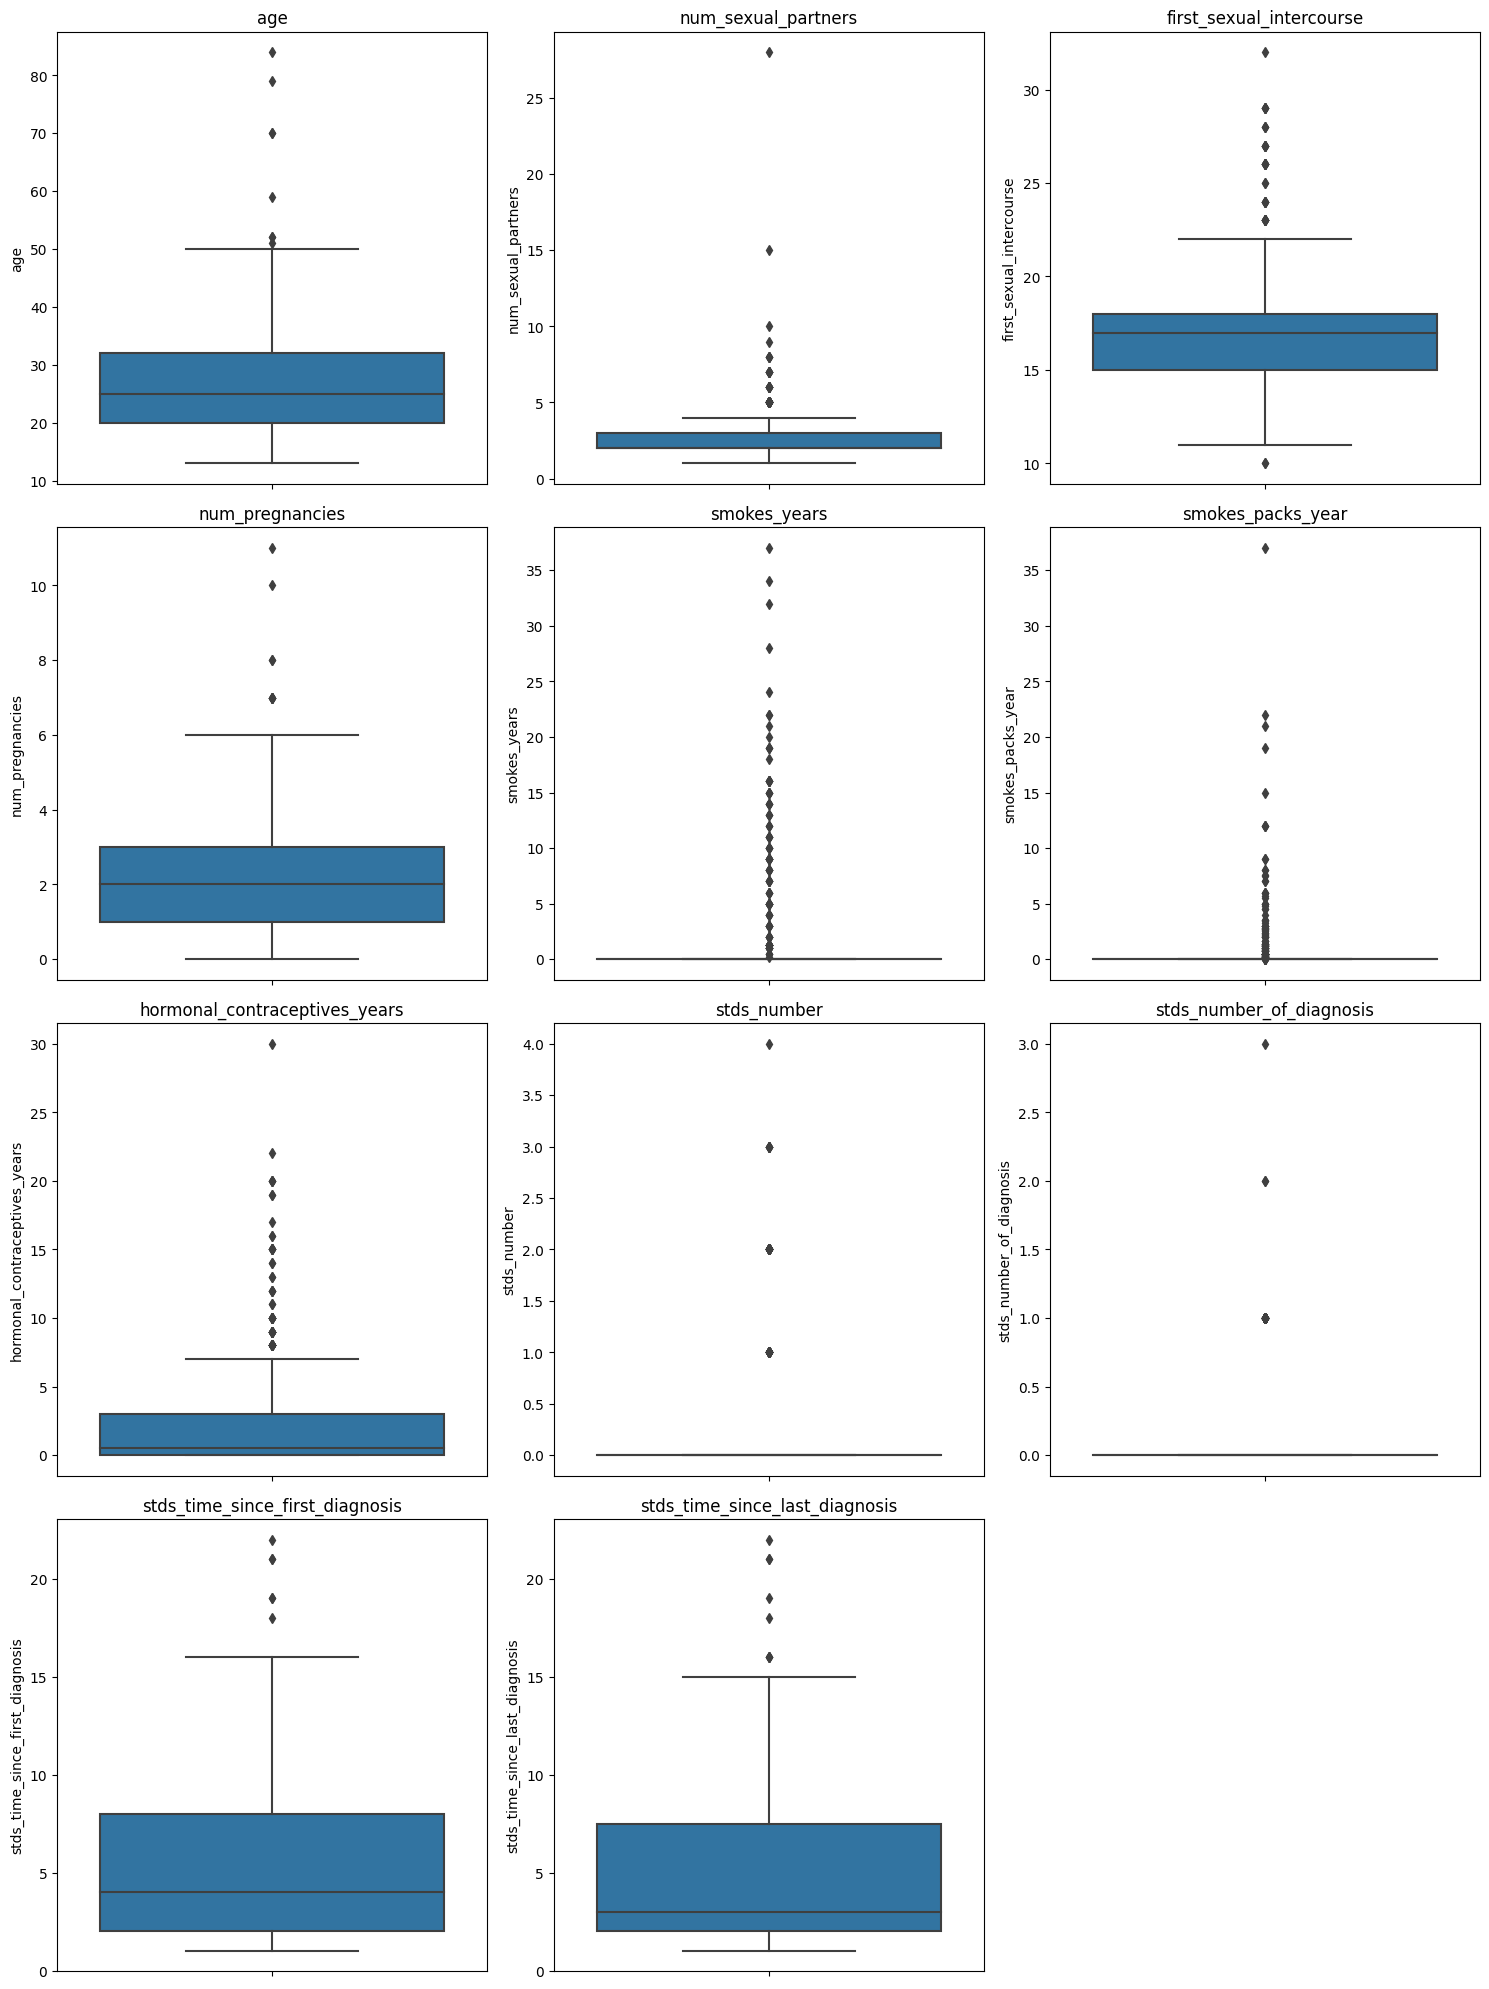

In [24]:
frequency_rows = len(cuantitative_vars) // 3 + 1
frequency_cols = 3

fig, axs = plt.subplots(frequency_rows, frequency_cols, figsize=(15, 5 * frequency_rows))
axs = axs.flatten()

for ax, var in zip(axs, cuantitative_vars):
    data[var] = pd.to_numeric(data[var], errors='coerce')
    sns.boxplot(y=var, data=data, ax=ax)
    ax.set_title(var)

for ax in axs[len(cuantitative_vars):]:
    ax.axis('off')

plt.tight_layout()

plt.show()


#### Graficos de dispersión

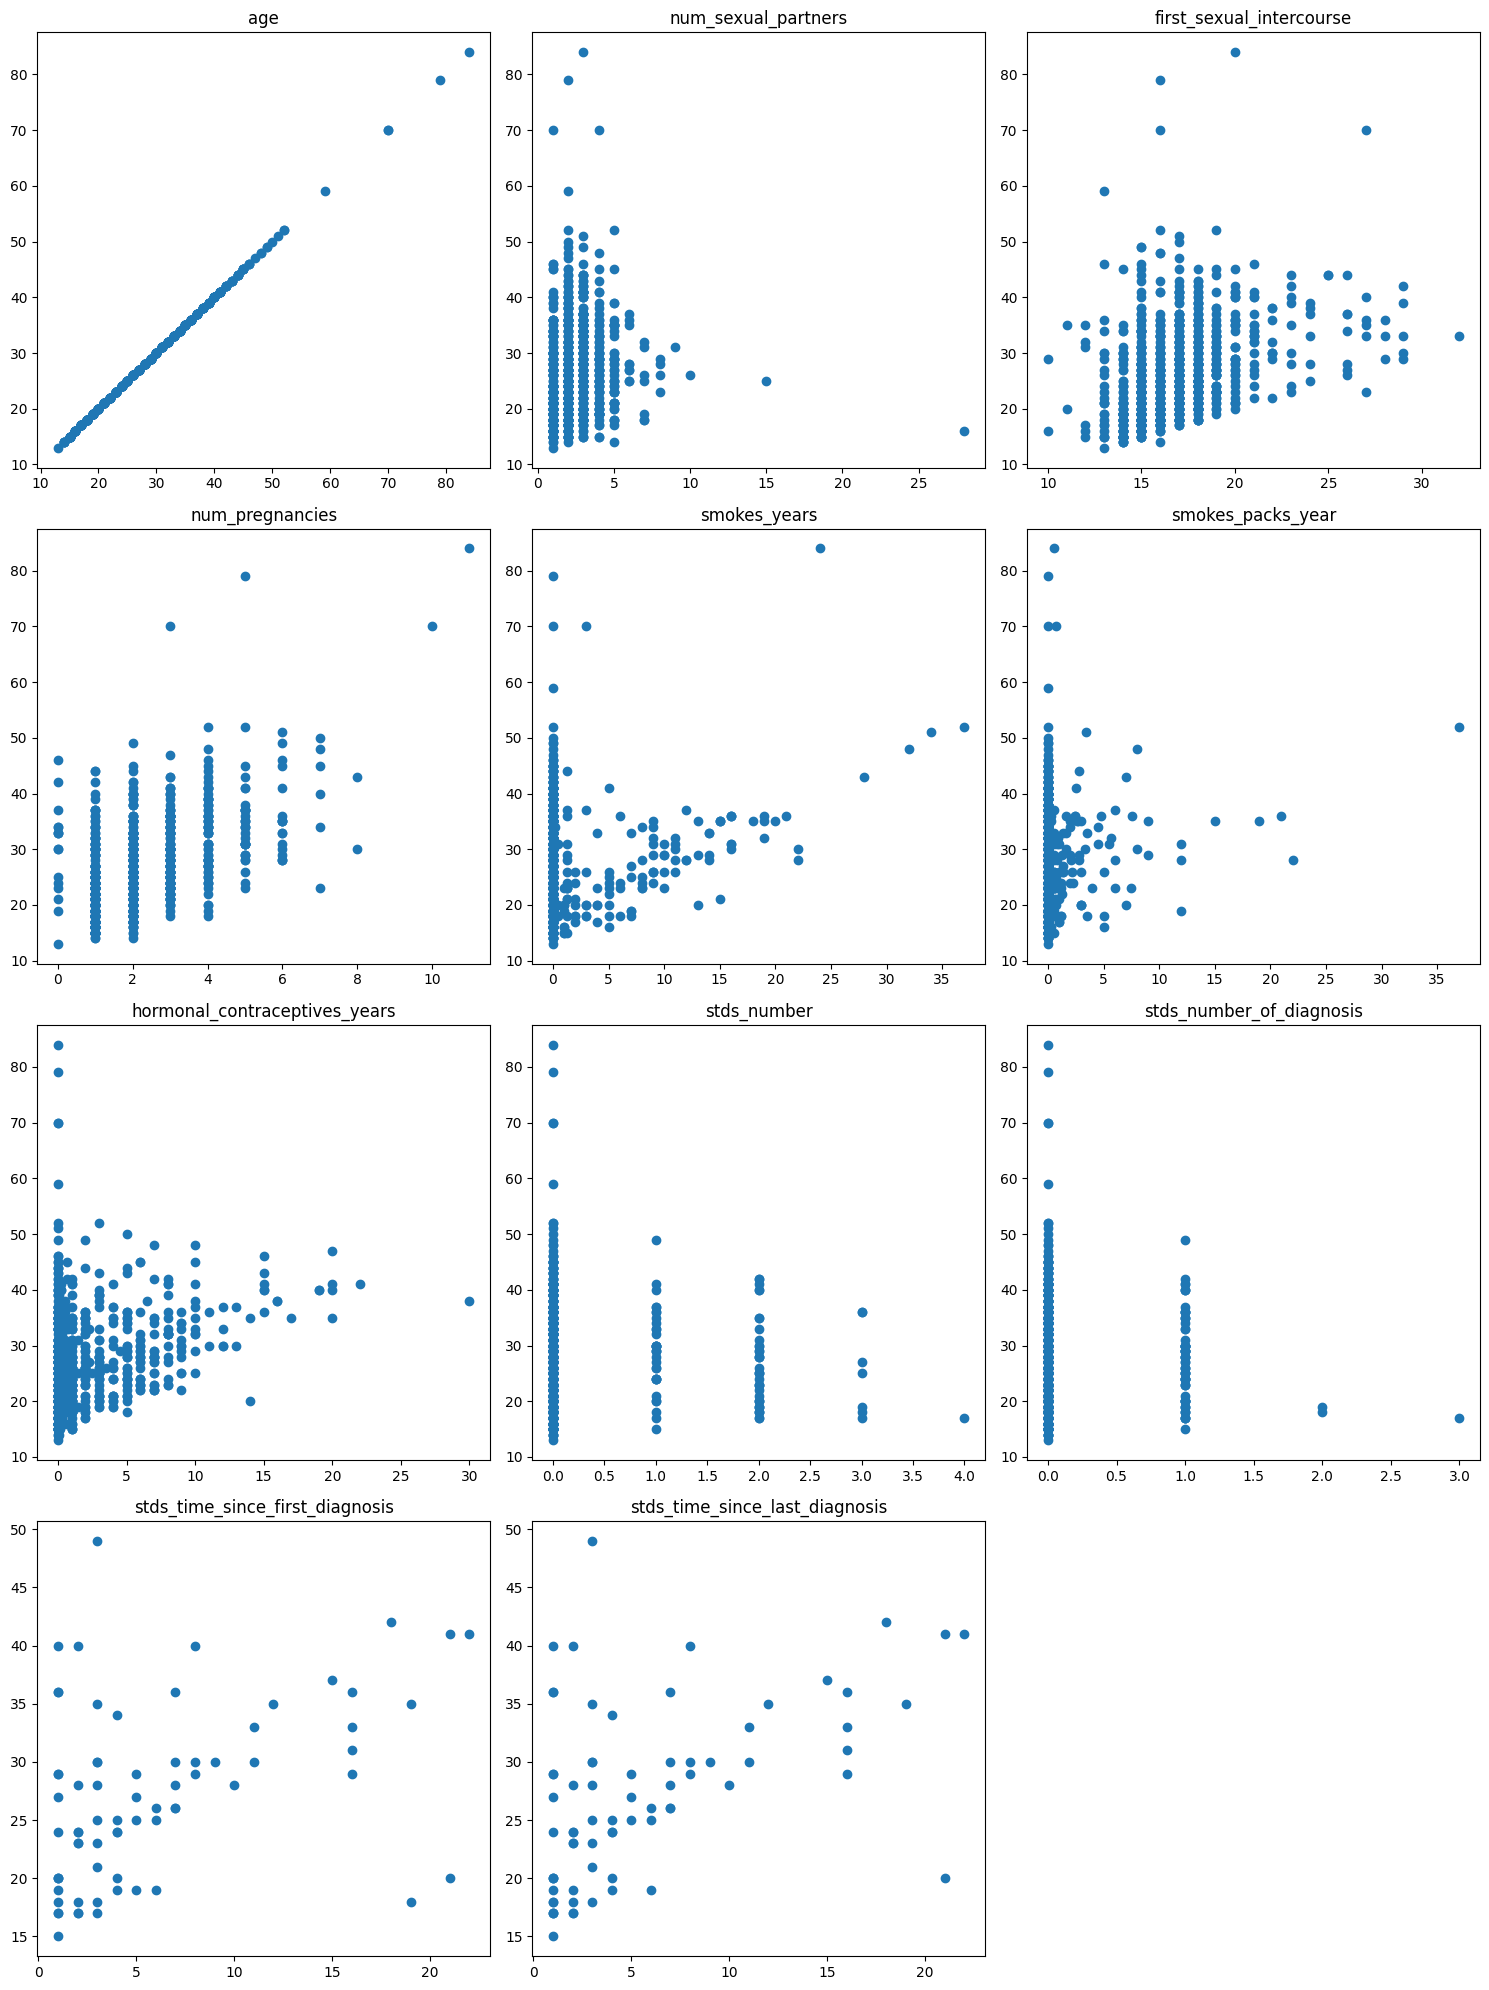

In [25]:
frequency_rows = len(cuantitative_vars) // 3 + 1
frequency_cols = 3

fig, axs = plt.subplots(frequency_rows, frequency_cols, figsize=(15, 5 * frequency_rows))
axs = axs.flatten()

for ax, var in zip(axs, cuantitative_vars):
    data[var] = pd.to_numeric(data[var], errors='coerce')
    ax.scatter(data[var], data['age'])
    ax.set_title(var)

for ax in axs[len(cuantitative_vars):]:
    ax.axis('off')

plt.tight_layout()

### Correlación de variables y datos atípicos


<Axes: >

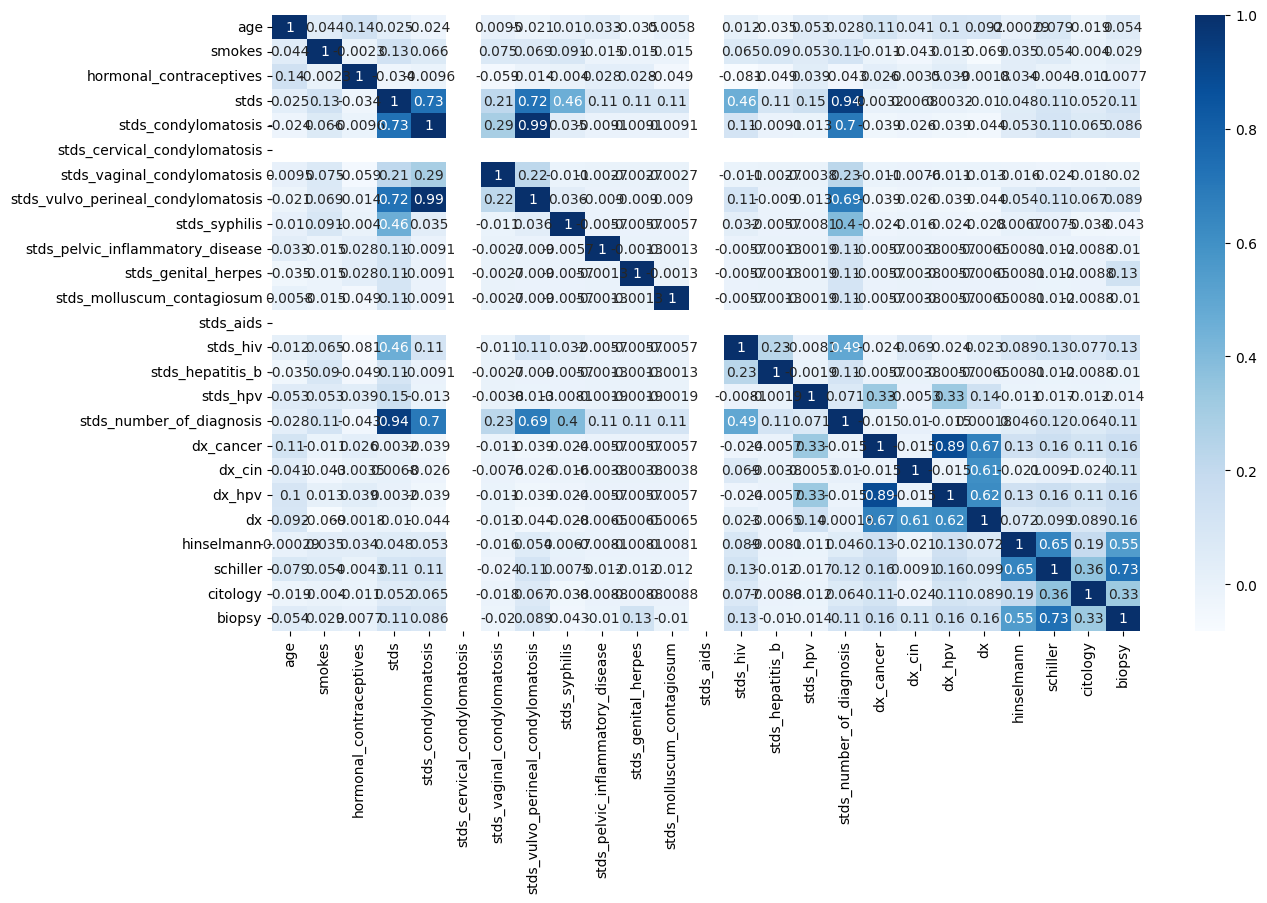

In [21]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(numeric_only=True,method='spearman'), annot=True, cmap='Blues')

### Estudiando variables categoricas

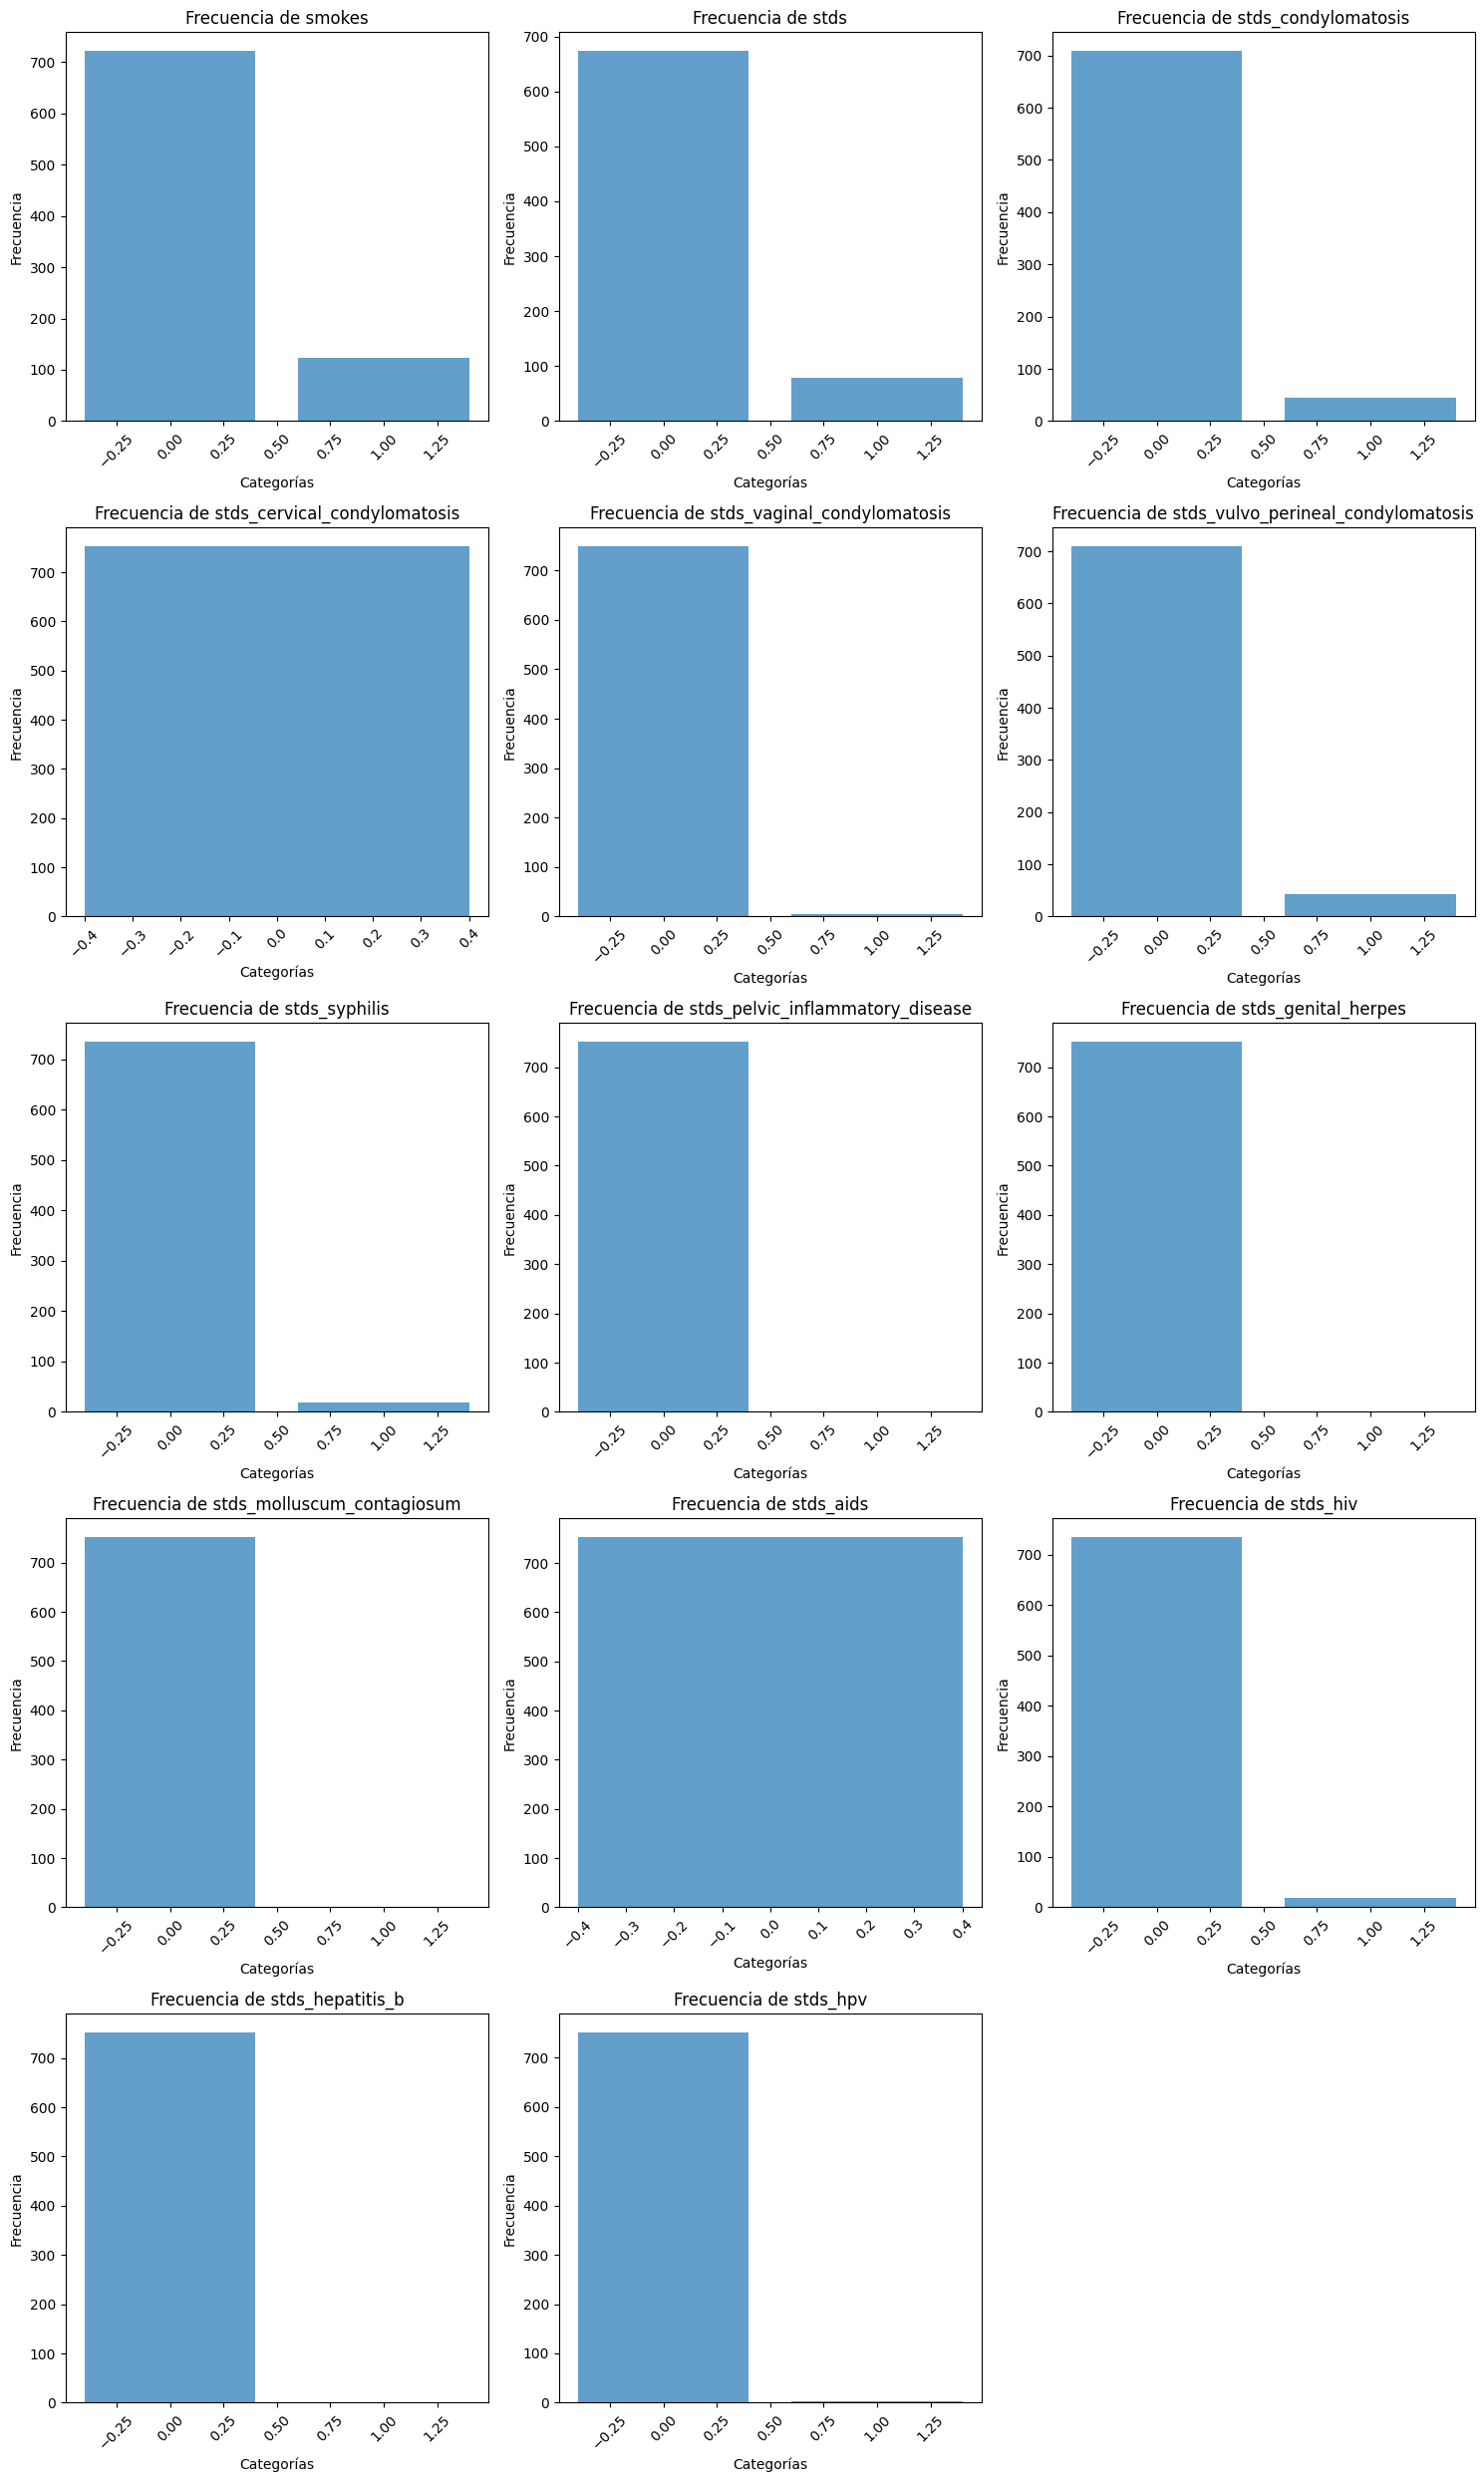

In [22]:
# Variables categoricas: dx_cancer, dx_cin, dx_hpv, dx, hinselmann, schiller, citology, biopsy, smokes, stds, stds_condylomatosis, stds_cervical_condylomatosis, stds_vaginal_condylomatosis, stds_vulvo_perineal_condylomatosis, stds_syphilis,stds_pelvic_inflammatory_disease, stds_genital_herpes, stds_molluscum_contagiosum, stds_aids, stds_hiv, stds_hepatitis_b, stds_hpv
frequency_data = {
	'smokes': data['smokes'].value_counts(),
	'stds': data['stds'].value_counts(),
	'stds_condylomatosis': data['stds_condylomatosis'].value_counts(),
	'stds_cervical_condylomatosis': data['stds_cervical_condylomatosis'].value_counts(),
	'stds_vaginal_condylomatosis': data['stds_vaginal_condylomatosis'].value_counts(),
	'stds_vulvo_perineal_condylomatosis': data['stds_vulvo_perineal_condylomatosis'].value_counts(),
	'stds_syphilis': data['stds_syphilis'].value_counts(),
	'stds_pelvic_inflammatory_disease': data['stds_pelvic_inflammatory_disease'].value_counts(),
	'stds_genital_herpes': data['stds_genital_herpes'].value_counts(),
	'stds_molluscum_contagiosum': data['stds_molluscum_contagiosum'].value_counts(),
	'stds_aids': data['stds_aids'].value_counts(),
	'stds_hiv': data['stds_hiv'].value_counts(),
	'stds_hepatitis_b': data['stds_hepatitis_b'].value_counts(),
	'stds_hpv': data['stds_hpv'].value_counts(),
}

frequency_rows = len(frequency_data.keys()) // 3 + 1
frequency_cols = 3

fig, axs = plt.subplots(frequency_rows, frequency_cols, figsize=(15, 5 * frequency_rows))
axs = axs.flatten()

# Plot each categorical variable on its corresponding subplot
for i, (variable, ax) in enumerate(zip(frequency_data.keys(), axs)):
    freq = frequency_data[variable]
    ax.bar(freq.index, freq.values, alpha=0.7)
    ax.set_title(f'Frecuencia de {variable}')
    ax.set_xlabel('Categorías')
    ax.set_ylabel('Frecuencia')
    ax.tick_params(axis='x', rotation=45)
# Eliminar subplots vacíos
for i in range(len(frequency_data.keys()), frequency_rows * frequency_cols):
    fig.delaxes(axs[i])
plt.tight_layout()
plt.show()






La variable categórica con más valores `1.0` es `smokes`, seguida por `stds`. Procedemos a realizar tablas de contingencia.



In [44]:
# Creando tablas de contingencia
contingency_tables = []
for variable in categorical_vars:
    contingency_table = pd.crosstab(data[variable], data['dx_cancer'])
    contingency_tables.append((variable, contingency_table))

contingency_tables = contingency_tables[1:]

for variable, table in contingency_tables:
    print(f"Contingency Table for '{variable}' vs. 'dx_cancer':")
    print(table)
    print('\n')

Contingency Table for 'dx_cin' vs. 'dx_cancer':
dx_cancer    0   1
dx_cin            
0          831  18
1            9   0


Contingency Table for 'dx_hpv' vs. 'dx_cancer':
dx_cancer    0   1
dx_hpv            
0          838   2
1            2  16


Contingency Table for 'dx' vs. 'dx_cancer':
dx_cancer    0   1
dx                
0          830   4
1           10  14


Contingency Table for 'hinselmann' vs. 'dx_cancer':
dx_cancer     0   1
hinselmann         
0           809  14
1            31   4


Contingency Table for 'schiller' vs. 'dx_cancer':
dx_cancer    0   1
schiller          
0          773  11
1           67   7


Contingency Table for 'citology' vs. 'dx_cancer':
dx_cancer    0   1
citology          
0          800  14
1           40   4


Contingency Table for 'biopsy' vs. 'dx_cancer':
dx_cancer    0   1
biopsy            
0          791  12
1           49   6


Contingency Table for 'smokes' vs. 'dx_cancer':
dx_cancer    0   1
smokes            
0.0        707  15
1.0  